In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import torchvision

from torchvision import transforms

In [ ]:

transform = transforms.Compose([
    transforms.Resize(227),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])


In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True, download=True, transform=transform)
trainloader = DataLoader(trainset,batch_size=32,shuffle=True, num_workers=2)
 
testset = torchvision.datasets.CIFAR10(root='./data',train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)
 
classes = ('plane','car','bird','cat','deer','dog','forg','horse','ship','truck')



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


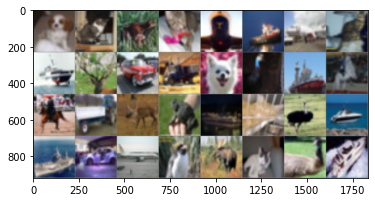

  dog   cat  forg   cat plane  ship plane   cat  ship  deer   car truck   dog  bird  ship horse horse truck  deer  forg  ship   cat  bird  ship  ship   car plane  bird  deer   cat  bird  ship


In [ ]:
def imshow(img):
    img = img/2 + 0.5
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1,2,0)))
    plt.show()
 
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(32)))


In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3,64,11,4)
        self.conv2 = nn.Conv2d(64,192,5,padding=2,groups=2)
        self.conv3 = nn.Conv2d(192,384,3,padding=1)
        self.conv4 = nn.Conv2d(384,256,3,padding=1, groups=2)
        self.conv5 = nn.Conv2d(256,256,3,padding=1,groups=2)
        self.fc1 = nn.Linear(256*6*6,4096)
        self.fc2 = nn.Linear(4096,1024)
        self.fc3 = nn.Linear(1024,num_classes)
 
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(F.relu(self.conv5(x)),(2,2))
        x = x.view(x.size(0),256*6*6)
        x = F.dropout(F.relu(self.fc1(x)),p=0.5)
        x = F.dropout(F.relu(self.fc2(x)),p=0.5)
        x = self.fc3(x)
        return x


In [ ]:

device = torch.device("cuda")
print(device)
 
net = AlexNet()
net.to(device)
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


cuda


In [ ]:

for epoch in range(20):
 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, lables = data
        inputs = inputs.to(device)
        lables = lables.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, lables)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d,%5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200)
            running_loss = 0.0
 
print('Finished Training')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  200] loss: 2.302
[1,  400] loss: 2.303
[1,  600] loss: 2.302
[1,  800] loss: 2.302
[1, 1000] loss: 2.302
[1, 1200] loss: 2.301
[1, 1400] loss: 2.300
[2,  200] loss: 2.294
[2,  400] loss: 2.274
[2,  600] loss: 2.144
[2,  800] loss: 2.030
[2, 1000] loss: 1.980
[2, 1200] loss: 1.934
[2, 1400] loss: 1.894
[3,  200] loss: 1.815
[3,  400] loss: 1.755
[3,  600] loss: 1.710
[3,  800] loss: 1.673
[3, 1000] loss: 1.676
[3, 1200] loss: 1.630
[3, 1400] loss: 1.597
[4,  200] loss: 1.565
[4,  400] loss: 1.537
[4,  600] loss: 1.513
[4,  800] loss: 1.491
[4, 1000] loss: 1.483
[4, 1200] loss: 1.424
[4, 1400] loss: 1.433
[5,  200] loss: 1.372
[5,  400] loss: 1.383
[5,  600] loss: 1.342
[5,  800] loss: 1.342
[5, 1000] loss: 1.341
[5, 1200] loss: 1.349
[5, 1400] loss: 1.301
[6,  200] loss: 1.268
[6,  400] loss: 1.262
[6,  600] loss: 1.229
[6,  800] loss: 1.241
[6, 1000] loss: 1.218
[6, 1200] loss: 1.200
[6, 1400] loss: 1.176
[7,  200] loss: 1.131
[7,  400] loss: 1.139
[7,  600] loss: 1.112
[7,  800] 

In [ ]:
torch.save(net, './model')
 
net = torch.load('./model')
print(net)


AlexNet(
  (conv1): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4))
  (conv2): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=2)
  (conv3): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
  (conv5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=10, bias=True)
)


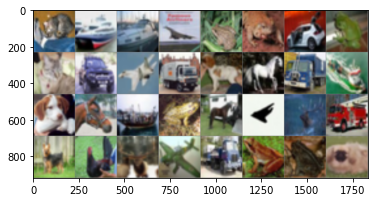

GroundTruth:    cat  ship  ship plane  forg  forg   car  forg   cat   car plane truck   dog horse truck  ship   dog horse  ship  forg horse plane  deer truck   dog  bird  deer plane truck  forg  forg   dog
Predicted:    cat  ship  ship plane  forg  forg   car  forg   cat   car plane truck   cat horse truck  ship   dog horse  ship  forg horse plane  deer truck  deer  forg  deer plane truck  forg  forg   dog


In [ ]:

dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(32)))
 
 
images, labels = images.to(device), labels.to(device)
 
outputs = net(images)
predicted = torch.argmax(outputs,1)
print('Predicted: ',' '.join('%5s'%classes[predicted[j]] for j in range(32)))


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        predicted = torch.argmax(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
print('Accuracy of the network on the 50000 train images: %d %%'%(100*correct/total))

Accuracy of the network on the 50000 train images: 94 %


In [ ]:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        predicted = torch.argmax(outputs.data,1)
        c = (predicted== labels)
        if len(c) == 16:
            for i in range(16):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += c[i].item()
        else:
            for i in range(32):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%'%(classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 82 %
Accuracy of  bird : 70 %
Accuracy of   cat : 66 %
Accuracy of  deer : 75 %
Accuracy of   dog : 59 %
Accuracy of  forg : 82 %
Accuracy of horse : 77 %
Accuracy of  ship : 89 %
Accuracy of truck : 81 %
